## Практическое задание 3

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### __Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [21]:
a_task1 = pd.DataFrame([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150], columns=['salary'])

M_task1 = a_task1['salary'].sum() / a_task1['salary'].count()
print(M_task1, '&', a_task1['salary'].mean())

65.3 & 65.3


In [23]:
var_off_task1 = ((a_task1['salary'] - M_task1) ** 2).sum() / a_task1['salary'].count()
var_noff_task1 = ((a_task1['salary'] - M_task1) ** 2).sum() / (a_task1['salary'].count() - 1)
print(var_off_task1, '&', a_task1['salary'].var(ddof=0), '\n', var_noff_task1, '&', a_task1['salary'].var(ddof=1))

950.11 & 950.11 
 1000.1157894736842 & 1000.1157894736842


In [24]:
std_off_task1 = np.sqrt(var_off_task1)
std_noff_task1 = np.sqrt(var_noff_task1)
print(std_off_task1, '&', a_task1['salary'].std(ddof=0), '\n', std_noff_task1, '&', a_task1['salary'].std(ddof=1))

30.823854398825596 & 30.823854398825596 
 31.624607341019814 & 31.624607341019814


### __Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

In [26]:
a_task1['salary'].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: salary, dtype: float64

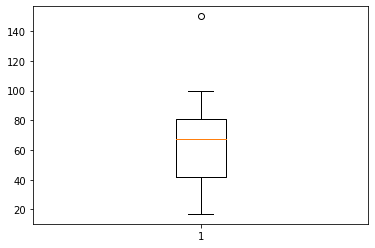

In [31]:
plt.boxplot(a_task1['salary'])
plt.show()

Выброс один. Найдём его функцией _max()_

In [32]:
a_task1['salary'].max()

150

### __Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

* $Q$ - Студень сдал сессиюй;
* $H_A$ - Студент из факультета A $(P(H_A)=0.25)$;
* $H_B$ - Студент из факультета B $(P(H_B)=0.25)$;
* $H_C$ - Студент из факультета C $(P(H_C)=0.5)$;
* $P(Q|H_A)=0.8$;
* $P(Q|H_B)=0.7$;
* $P(Q|H_C)=0.9$;

Необходимо найти: a) $P(H_A|Q)$; б) $P(H_B|Q)$; в) $P(H_C|Q)$

Для этого необходимо воспользоваться формулой **Байеса**:

$$P(H_n|Q)=\frac{P(Q|H_n)\cdot P(H_n)}{P(Q)}$$

Для этого найдём $P(Q)$ по формуле **полной вероятности**:

$$P(Q) = P(Q|H_A)\cdot P(H_A)+P(Q|H_B)\cdot P(H_B)+P(Q|H_C)\cdot P(H_C)=0.8\cdot0.25+0.7\cdot0.25+0.9\cdot0.5=0.825$$

In [1]:
0.8 * 0.25 + 0.7 * 0.25 + 0.9 * 0.5

0.825

$$a)\enspace P(H_A|Q)=\frac{0.8\cdot0.25}{0.825}=\frac{8}{33};$$  
$$б)\enspace P(H_B|Q)=\frac{0.7\cdot0.25}{0.825}=\frac{7}{33};$$  
$$в)\enspace P(H_C|Q)=\frac{0.9\cdot0.5}{0.825}=\frac{18}{33}$$

In [3]:
8 / 33, 7 / 33, 18 / 33

(0.24242424242424243, 0.21212121212121213, 0.5454545454545454)

In [2]:
0.8 * 0.25 / 0.825, 0.7 * 0.25 / 0.825, 0.9 * 0.5 / 0.825

(0.24242424242424246, 0.21212121212121213, 0.5454545454545455)